In [53]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import torch
import torch.nn as nn
import torch.nn.functional as F

import os

In [ ]:
#Dataset: https://www.kaggle.com/datasets/kmader/satellite-images-of-hurricane-damage

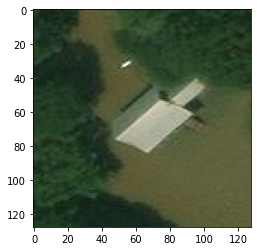

In [54]:
img = 'archive/train_another/damage/-93.6141_30.754263.jpeg'

example_damages = mpimg.imread(img)
imgplot = plt.imshow(example_damages)
plt.show()

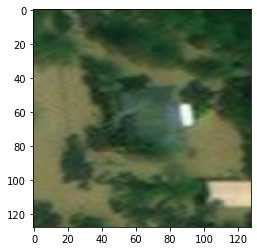

In [55]:
img2 = 'archive/train_another/damage/-95.086_29.827665000000003.jpeg'

example_no_damages = mpimg.imread(img2)
imgplot = plt.imshow(example_no_damages)
plt.show()

In [56]:
plt.imread(img).shape

(128, 128, 3)

In [57]:
def get_dataset(damages_path, nodamages_path):
     dataset = []
     not_found = 0

     directory = os.fsencode(damages_path)

     for file in os.listdir(directory):
          filename = os.fsdecode(file)
          try:
               x = plt.imread(damages_path + filename)
               dataset.append((torch.tensor(x), torch.ones(1)))
          except:
               not_found += 1

     directory = os.fsencode(nodamages_path)

     for file in os.listdir(directory):
          filename = os.fsdecode(file)
          try:
               x = plt.imread(nodamages_path + filename)
               dataset.append((torch.tensor(x), torch.zeros(1)))
          except:
               not_found += 1

     return (dataset, not_found)

In [58]:
damages_train = 'archive/train_another/damage/'
nodamages_train = 'archive/train_another/no_damage/'

damages_validation = 'archive/validation_another/damage/'
nodamages_validation = 'archive/validation_another/no_damage/'

In [59]:
from torch.utils.data import DataLoader

dataset, not_found = get_dataset(damages_train, nodamages_train)
train_dataloader = DataLoader(dataset, batch_size=64, shuffle=True)
print(not_found)

validation, not_found = get_dataset(damages_validation, nodamages_validation)
validation_dataloader = DataLoader(validation, batch_size=64, shuffle=True)
print(not_found)

0
0


In [60]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 3)
        self.conv2 = nn.Conv2d(6, 12, 3)
        self.conv3 = nn.Conv2d(12, 12, 3)
        self.flat = nn.Flatten()
        self.linear = nn.Linear(432, 1)

    def forward(self, x):
        x = F.max_pool2d(F.relu(self.conv1(x)), 2)
        x = F.max_pool2d(F.relu(self.conv2(x)), 3)
        x = F.max_pool2d(F.relu(self.conv3(x)), 3)
        x = self.flat(x)
        x = self.linear(x)

        return torch.sigmoid(x)

In [61]:
net = Net()
print(net)

Net(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(6, 12, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(12, 12, kernel_size=(3, 3), stride=(1, 1))
  (flat): Flatten(start_dim=1, end_dim=-1)
  (linear): Linear(in_features=432, out_features=1, bias=True)
)


In [62]:
total_loss = 0
no_items = 0

loss_func = nn.BCELoss()

for image, label in validation_dataloader:
    net.zero_grad()

    h = image / 255
    x = h.permute(0, 3, 1, 2)

    y_hat = net(x)
    loss = loss_func(y_hat, label)

    total_loss += loss.item()
    no_items += 1

print(f'Validation before training: {total_loss / no_items}')
total_loss = 0
no_items = 0

Validation before training: 0.6935738939791918


In [63]:
import torch.optim as optim

loss_func = nn.BCELoss()
optimizer = optim.Adam(net.parameters())

total_loss = 0
no_items = 0

for epoch in range(0, 10):
    for image, label in train_dataloader:
        net.zero_grad()
        
        h = image / 255
        x = h.permute(0, 3, 1, 2)

        y_hat = net(x)
        loss = loss_func(y_hat, label)
        loss.backward()

        total_loss += loss.item()
        no_items += 1

        optimizer.step()

    print(f'{epoch}: {total_loss / no_items}')
    total_loss = 0
    no_items = 0

0: 0.638943093787333
1: 0.5129801520876064
2: 0.40509730463574645
3: 0.34547680568922856
4: 0.315608090560907
5: 0.28598695253110995
6: 0.26474973388538237
7: 0.25772838750082977
8: 0.24255988476382698
9: 0.23473300087224147


In [64]:
total_loss = 0
no_items = 0

loss_func = nn.BCELoss()

for image, label in validation_dataloader:
    net.zero_grad()

    h = image / 255
    x = h.permute(0, 3, 1, 2)

    y_hat = net(x)
    loss = loss_func(y_hat, label)

    total_loss += loss.item()
    no_items += 1

print(f'Validation after training: {total_loss / no_items}')
total_loss = 0
no_items = 0

Validation after training: 0.22966770140919834


In [72]:
h = torch.tensor(plt.imread(img)) / 255
x  = h.permute(2, 0, 1).unsqueeze(0)

net(x)

torch.Size([1, 3, 128, 128])


tensor([[0.9896]], grad_fn=<SigmoidBackward0>)

In [73]:
h = torch.tensor(plt.imread(img2)) / 255
x  = h.permute(2, 0, 1).unsqueeze(0)

net(x)

tensor([[0.2934]], grad_fn=<SigmoidBackward0>)